In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Assume x is a numpy array of shape (2, ) so basically
# x = [x1, x2]
def f(x):
    x1 = x[0]
    x2 = x[1]
    return 10 * (x1 - 1)**2 + (x2 + 1)**2

def grad_f(x):
    x1 = x[0]
    x2 = x[1]
    return np.array([20*(x1 - 1), 2*(x2 + 1)])

True solution: [ 1 -1]
Compute solution: [ 1.         -0.99995178].
Number of iterations: 491.


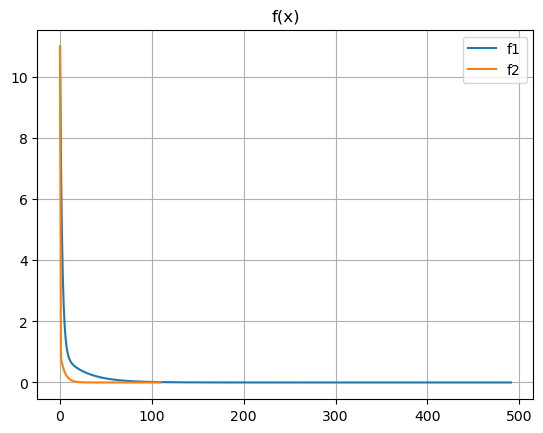

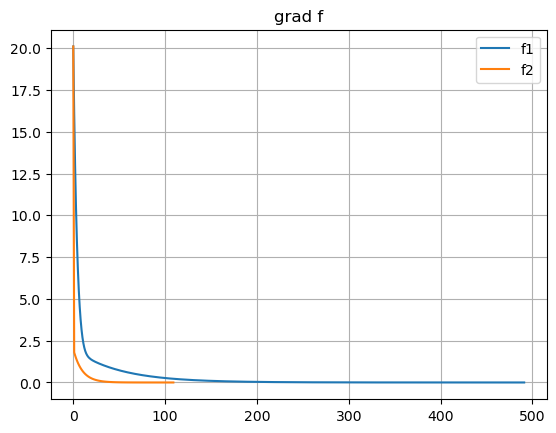

In [2]:
def GD(f, grad_f, x0, alpha, maxit=1000, tolf=1e-6, tolx=1e-6):
    # Initialize the infos
    f_val = np.zeros((maxit+1, ))
    grad_norm = np.zeros((maxit+1, ))

    # Set the values of the infos for x0
    f_val[0] = f(x0)
    grad_norm[0] = np.linalg.norm(grad_f(x0))

    # Kernel of the code:
    # Implement the for loop for the update of x
    for k in range(maxit):
        x = x0 - alpha * grad_f(x0)

        # Update the info
        f_val[k+1] = f(x)
        grad_norm[k+1] = np.linalg.norm(grad_f(x))

        # Stopping criteria
        if np.linalg.norm(grad_f(x)) <= tolf * grad_norm[0] or np.linalg.norm(x - x0) < tolx:
            break

        # Update of x0
        x0 = x
    
    # Cut off the exeeding values
    f_val = f_val[:k+1]
    grad_norm = grad_norm[:k+1]

    return x, k, f_val, grad_norm

# Define the parameters
x0 = np.zeros((2, ))
alpha = 0.01

# Set the true minima
x_true = np.array([1, -1])
print(f"True solution: {x_true}")

# Solve
x_sol, k, f_val, grad_norm = GD(f, grad_f, x0, alpha)
print(f"Compute solution: {x_sol}.")
print(f"Number of iterations: {k}.")

x_sol2, k2, f_val2, grad_norm2 = GD(f, grad_f, x0, alpha=0.05)

# Plot the f_val and grad_norm vectors
plt.plot(f_val)
plt.plot(f_val2)
plt.title("f(x)")
plt.legend(["f1", "f2"])
plt.grid()
plt.show()

plt.plot(grad_norm)
plt.plot(grad_norm2)
plt.legend(["f1", "f2"])
plt.title("grad f")
plt.grid()
plt.show()

True solution: [ 1 -1]
Compute solution: [ 1.         -0.99999155].
Number of iterations: 66.
Compute solution: [ 1.         -0.99999116].
Number of iterations: 93.


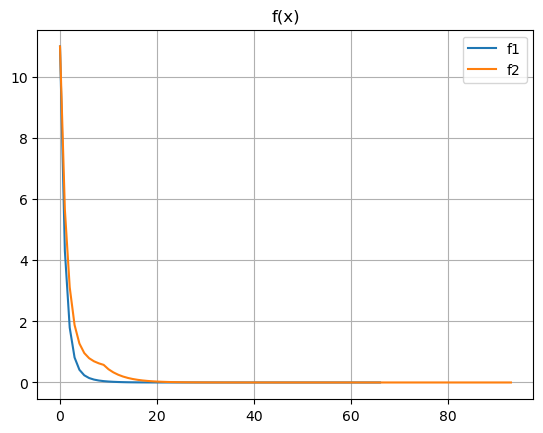

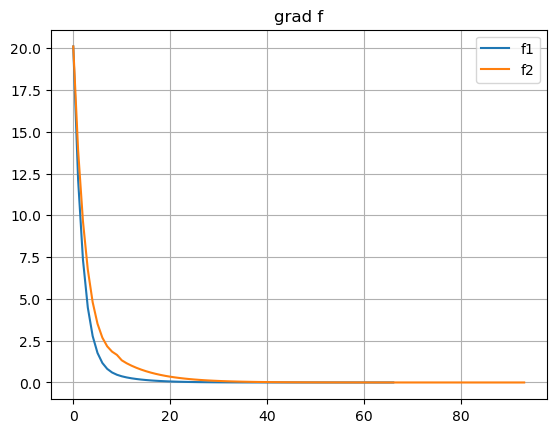

In [3]:
import numpy as np

def backtracking(f, grad_f, x):
    """
    This function is a simple implementation of the backtracking algorithm for
    the GD (Gradient Descent) method.
    
    f: function. The function that we want to optimize.
    grad_f: function. The gradient of f(x).
    x: ndarray. The actual iterate x_k.
    """
    alpha = 1
    c = 0.8
    tau = 0.25
    
    while f(x - alpha * grad_f(x)) > f(x) - c * alpha * np.linalg.norm(grad_f(x), 2) ** 2:
        alpha = tau * alpha
    return alpha

def GD_backtracking(f, grad_f, x0, maxit=1000, tolf=1e-6, tolx=1e-6):
    # Initialize the infos
    f_val = np.zeros((maxit+1, ))
    grad_norm = np.zeros((maxit+1, ))

    # Set the values of the infos for x0
    f_val[0] = f(x0)
    grad_norm[0] = np.linalg.norm(grad_f(x0))

    # Kernel of the code:
    # Implement the for loop for the update of x
    for k in range(maxit):
        # Compute alpha
        alpha = backtracking(f, grad_f, x0)

        x = x0 - alpha * grad_f(x0)

        # Update the info
        f_val[k+1] = f(x)
        grad_norm[k+1] = np.linalg.norm(grad_f(x))

        # Stopping criteria
        if np.linalg.norm(grad_f(x)) <= tolf * grad_norm[0] or np.linalg.norm(x - x0) < tolx:
            break

        # Update of x0
        x0 = x
    
    # Cut off the exeeding values
    f_val = f_val[:k+1]
    grad_norm = grad_norm[:k+1]

    return x, k, f_val, grad_norm

# Define the parameters
x0 = np.zeros((2, ))
alpha = 0.08

# Set the true minima
x_true = np.array([1, -1])
print(f"True solution: {x_true}")

# Solve
x_sol, k, f_val, grad_norm = GD(f, grad_f, x0, alpha)
print(f"Compute solution: {x_sol}.")
print(f"Number of iterations: {k}.")

x_back, k_back, f_val_back, grad_norm_back = GD_backtracking(f, grad_f, x0)
print(f"Compute solution: {x_back}.")
print(f"Number of iterations: {k_back}.")


# Plot the f_val and grad_norm vectors
plt.plot(f_val)
plt.plot(f_val_back)
plt.title("f(x)")
plt.legend(["f1", "f2"])
plt.grid()
plt.show()

plt.plot(grad_norm)
plt.plot(grad_norm_back)
plt.legend(["f1", "f2"])
plt.title("grad f")
plt.grid()
plt.show()